In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

## Load data

In [2]:
white_wine_path='./Data/no-duplicates-winequality-white.csv'
w_df=pd.read_csv(white_wine_path, sep=',')
w_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


## Dummy Encoding

Our Wine Quality data is all numeric so there is no dummy encoding required (unless we want to bin some of our features but that loses us some granularity in the data) If we did have a column(s) we wanted to dummy encode we can use the following pseudo code

dummies=pd.get_dummies(df[['column 1', 'column 2']], drop_first=True)
dummies=pd.concat([df, dummies], axis=1)
dummies.drop(['column 1', 'column 2'])

## Scaling Data

Our wine quality data 
We first have to look at the data distributions of each feature

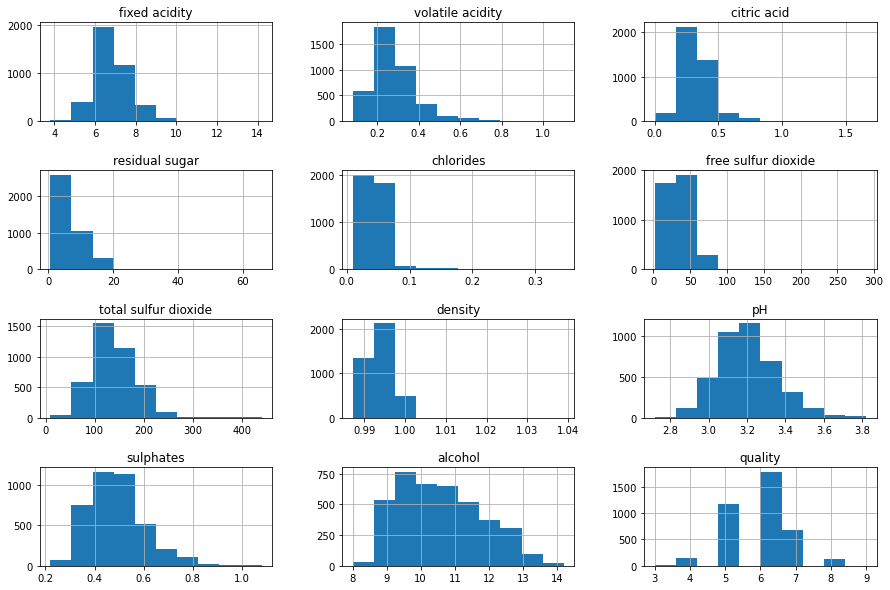

In [3]:
w_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

None of the data distributions look gaussian so we can use RobustScaler instead of StandardScaler. Scaling is most important when using algorithms that use a 'distance' based metric such as k-nearest neighbors which may have some features overpower others simply because of the scale used. Here we show how scaling affects a knn model.

#### Scaling with GridSearchCV and RobustScaler on knn model

In [13]:
y=w_df['quality']
X=w_df.drop('quality', axis=1)

In [14]:
steps=[('knn', KNeighborsClassifier())]
pipe=Pipeline(steps)
parameters= {'knn__n_neighbors': np.arange(1,50)}
kf=KFold(n_splits=5, shuffle=True, random_state=123)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=123)
cv=GridSearchCV(pipe,param_grid=parameters,cv=kf,scoring='f1_macro')
cv.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1_macro')

In [15]:
cv.best_params_

{'knn__n_neighbors': 1}

In [16]:
cv.best_score_

0.2137579320056327

In [17]:
y_pred=cv.predict(X_test)
f1=f1_score(y_test,y_pred, average='macro')
f1

0.19005773849235924

Now let us add RobustScaler

In [18]:
steps=[('scaler', RobustScaler()),('knn', KNeighborsClassifier())]
pipe=Pipeline(steps)
parameters= {'knn__n_neighbors': np.arange(1,50)}
kf=KFold(n_splits=5, shuffle=True, random_state=123)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=123)
cv=GridSearchCV(pipe,param_grid=parameters,cv=kf, scoring='f1_macro')
cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1_macro')

In [19]:
cv.best_params_

{'knn__n_neighbors': 5}

In [20]:
cv.best_score_

0.2761050746822658

In [21]:
y_pred=cv.predict(X_test)
f1=f1_score(y_test,y_pred, average='macro')
f1

0.24432011341322024

While f1_score was improved greatly, f1=0.244 is still quite low, maybe k-nearest neighbors is not the best model to use for this classification task.